In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
my_palette = sns.color_palette(['#4FB7B6','#F6886F','#186C8B','#578A93','#99AFA0','#D76841','#DC9A61'])


### read font
from matplotlib import font_manager

font_dirs = ['font']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

In [3]:
important_dates = {}
important_dates['stay-at-home'] = datetime.datetime(2020,3,11) # WHO pandemic declaration

### Figure 2

In [4]:
data = pd.read_csv('data_figs/fig2/data_fig2.csv')
data.date = pd.to_datetime(data.date)
data = data.set_index('date')

/home/centellegher/covid/lib/python3.6/site-packages/ipykernel_launcher.py:131: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/home/centellegher/covid/lib/python3.6/site-packages/ipykernel_launcher.py:187: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


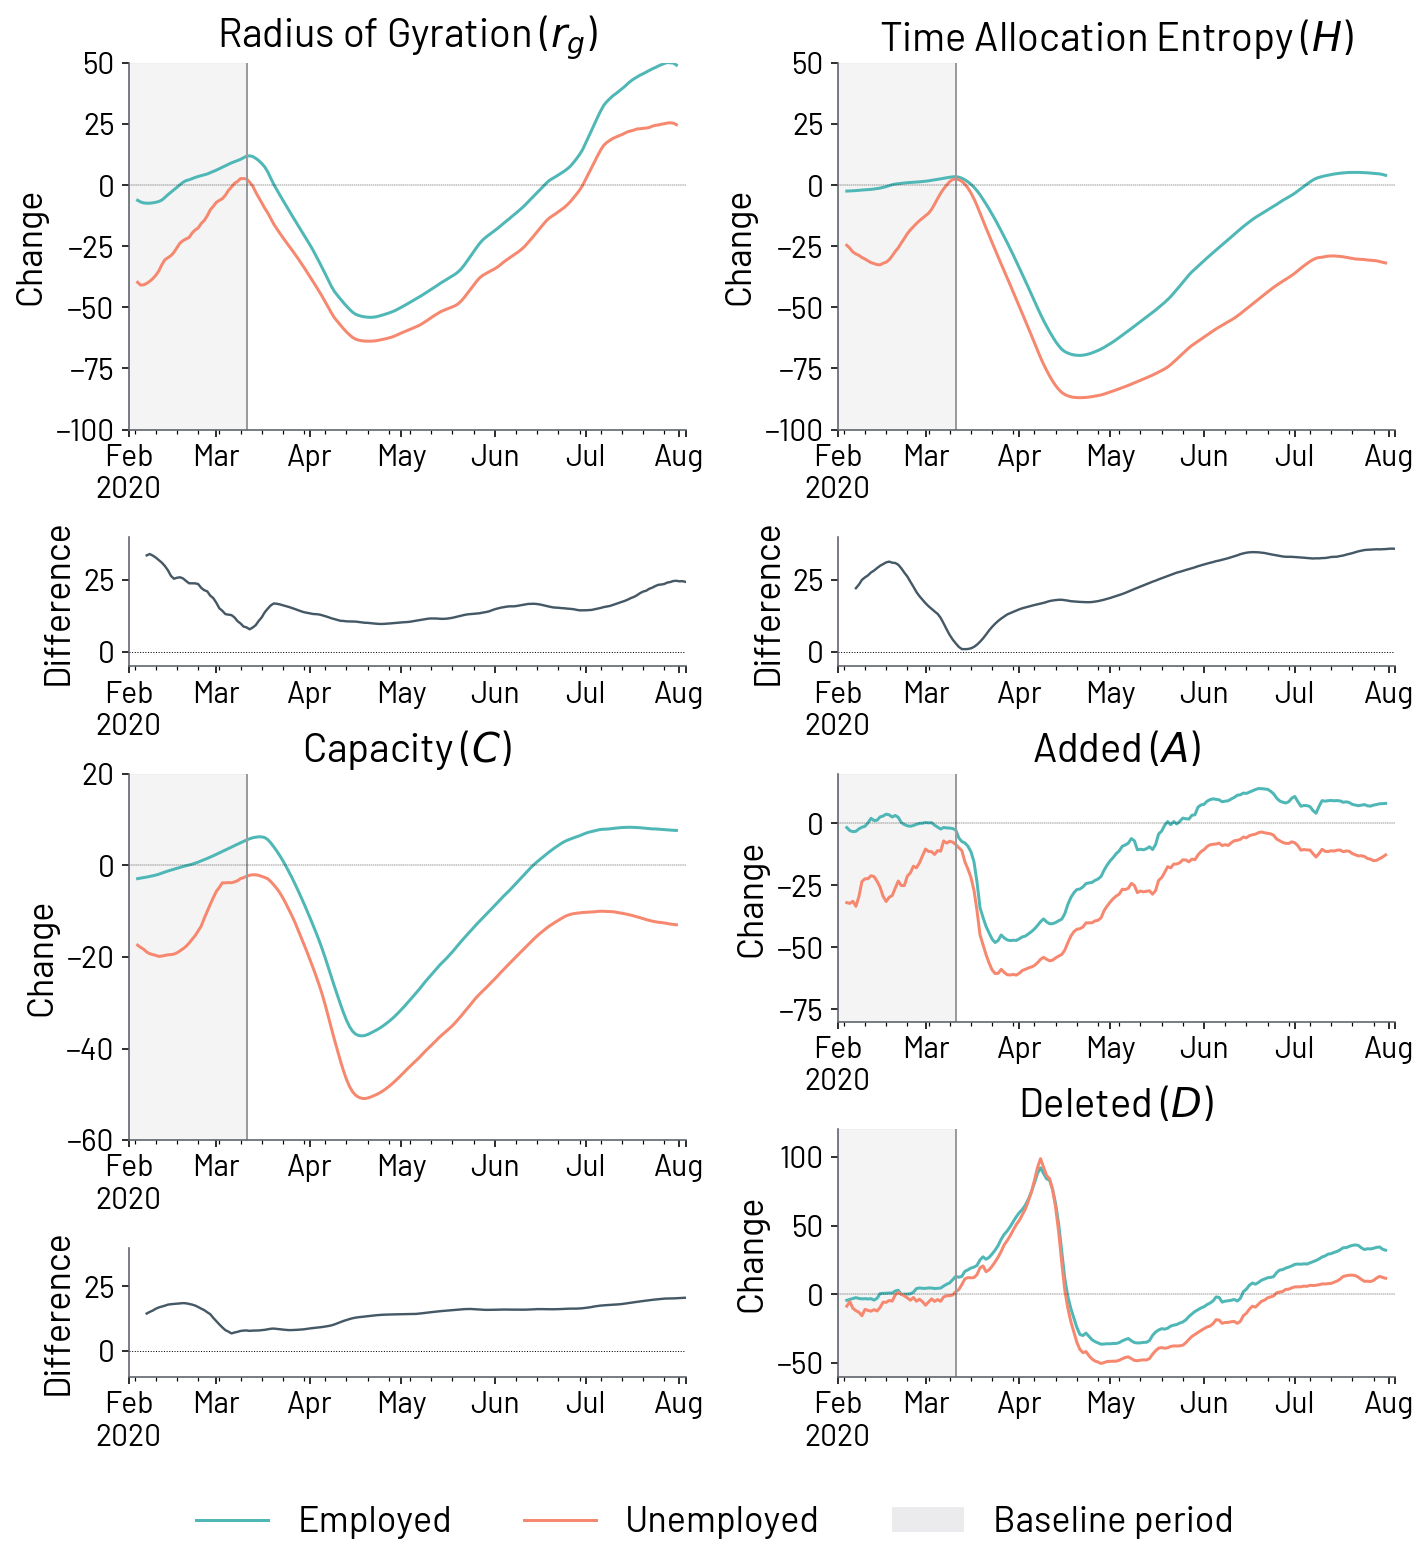

In [5]:
END_BASELINE_WIN = '2020-03-07'
START_BASELINE_WIN = '2020-02-01'

my_lg = '#EBEBED' # lightgrey
plt.rcParams['axes.edgecolor']='#5C6068'

fig = plt.figure(figsize=(10,10))
axd = fig.subplot_mosaic(
    [['a','b'],
    ['a','b'],
    ['a','b'],
    ['a','b'],
    ['c','d'],
    ['c','d'],
    
    ['e','f'],
    ['e','f'],
    ['e','f'],
    ['e','g'],
    ['h','g'],
    ['h','g']]
)

########### RADIUS #############
my_metric = 'radius_gyr_time'

data[data.unemployment == 0][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['a'], color=my_palette[0], linewidth=1.5, label='Employed')
data[data.unemployment == 1][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['a'], color=my_palette[1], linewidth=1.5, label='Unemployed')
axd['a'].axvline(important_dates['stay-at-home'], color='#999B9F', linewidth=1)
axd['a'].axvspan(data.index.min(), important_dates['stay-at-home'], alpha=0.5, color=my_lg)
axd['a'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['a'].set_title(r'Radius of Gyration ($r_g$)', fontsize=20)
# remove spines
axd['a'].spines['top'].set_visible(False)
axd['a'].spines['right'].set_visible(False)
axd['a'].set_ylabel('Change', fontsize=18)
axd['a'].set_xlabel('')
axd['a'].tick_params(axis='both', which='major', labelsize=15)

########### DIFF #############
change_unempl = data[data.unemployment == 0][f'change_{my_metric}'].sort_index()
change_empl = data[data.unemployment == 1][f'change_{my_metric}'].sort_index()
diff = (change_unempl - change_empl) #/ change_empl
diff.rolling(7).mean().plot(ax=axd['c'], color='#455866', linewidth=1.2, label='Employed')
diff_base = diff[(diff.index >= START_BASELINE_WIN) & (diff.index <= END_BASELINE_WIN)].mean()
axd['c'].axhline(0, color='black', ls=':', linewidth=0.5)


plt.tight_layout()
axd['c'].spines['top'].set_visible(False)
axd['c'].spines['right'].set_visible(False)
axd['c'].set_ylabel('Difference', fontsize=18)
axd['c'].tick_params(axis='both', which='major', labelsize=15)
axd['c'].set_xlabel('')


########### ENTROPY #############
my_metric = 'entropy_of_places_time'

data[data.unemployment == 0][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['b'], color=my_palette[0], linewidth=1.5, label='Employed')
data[data.unemployment == 1][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['b'], color=my_palette[1], linewidth=1.5, label='Unemployed')
axd['b'].axvline(important_dates['stay-at-home'], color='#999B9F', linewidth=1)
axd['b'].axvspan(data.index.min(), important_dates['stay-at-home'], alpha=0.5, color=my_lg)
axd['b'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['b'].set_title(r'Time Allocation Entropy ($H$)', fontsize=20)   
# remove spines
axd['b'].spines['top'].set_visible(False)
axd['b'].spines['right'].set_visible(False)
axd['b'].set_ylabel('Change', fontsize=18)
axd['b'].set_xlabel('')
axd['b'].tick_params(axis='both', which='major', labelsize=15)

axd['a'].set_ylim([-100,50])
axd['b'].set_ylim([-100,50])
# axd['b'].sharey(axd['a'])


########### DIFF #############

change_unempl = data[data.unemployment == 0][f'change_{my_metric}'].sort_index()
change_empl = data[data.unemployment == 1][f'change_{my_metric}'].sort_index()
diff = (change_unempl - change_empl) #/ change_empl
diff.rolling(7).mean().plot(ax=axd['d'], color='#455866', linewidth=1.2, label='Employed')
diff_base = diff[(diff.index >= START_BASELINE_WIN) & (diff.index <= END_BASELINE_WIN)].mean()
axd['d'].axhline(0, color='black', ls=':', linewidth=0.5)


plt.tight_layout()
axd['d'].spines['top'].set_visible(False)
axd['d'].spines['right'].set_visible(False)
axd['d'].set_ylabel('Difference', fontsize=18)
axd['d'].tick_params(axis='both', which='major', labelsize=15)
axd['d'].set_xlabel('')

axd['c'].set_ylim([-5,40])
axd['d'].set_ylim([-5,40])
# axd['c'].sharey(axd['d'])


########### CAPACITY #############

my_metric = 'C'

data[data.unemployment == 0][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['e'], color=my_palette[0], linewidth=1.5, label='Employed')
data[data.unemployment == 1][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['e'], color=my_palette[1], linewidth=1.5, label='Unemployed')
axd['e'].axvline(important_dates['stay-at-home'], color='#999B9F', linewidth=1)
axd['e'].axvspan(data.index.min(), important_dates['stay-at-home'], alpha=0.5, color=my_lg)
axd['e'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['e'].set_title(r'Capacity ($C$)', fontsize=20)
# remove spines
axd['e'].spines['top'].set_visible(False)
axd['e'].spines['right'].set_visible(False)
axd['e'].set_ylabel('Change', fontsize=18)
axd['e'].set_xlabel('')
axd['e'].tick_params(axis='both', which='major', labelsize=15)

axd['e'].set_ylim([-60,20])


########### DIFF #############
change_unempl = data[data.unemployment == 0][f'change_{my_metric}'].sort_index()
change_empl = data[data.unemployment == 1][f'change_{my_metric}'].sort_index()
diff = (change_unempl - change_empl) #/ change_empl
diff.rolling(7).mean().plot(ax=axd['h'], color='#455866', linewidth=1.2, label='Employed')
diff_base = diff[(diff.index >= START_BASELINE_WIN) & (diff.index <= END_BASELINE_WIN)].mean()
axd['h'].axhline(0, color='black', ls=':', linewidth=0.5)

plt.tight_layout()
axd['h'].spines['top'].set_visible(False)
axd['h'].spines['right'].set_visible(False)
axd['h'].set_ylabel('Difference', fontsize=18)
axd['h'].tick_params(axis='both', which='major', labelsize=15)
axd['h'].set_xlabel('')
axd['h'].set_ylim([-10,40])

########### ADDED #############
my_metric = 'A'

data[data.unemployment == 0][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['f'], color=my_palette[0], linewidth=1.5, label='Employed')
data[data.unemployment == 1][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['f'], color=my_palette[1], linewidth=1.5, label='Unemployed')
axd['f'].axvline(important_dates['stay-at-home'], color='#999B9F', linewidth=1)
axd['f'].axvspan(data.index.min(), important_dates['stay-at-home'], alpha=0.5, color=my_lg)
axd['f'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['f'].set_title(r'Added ($A$)', fontsize=20)
# remove spines
axd['f'].spines['top'].set_visible(False)
axd['f'].spines['right'].set_visible(False)
axd['f'].set_ylabel('Change', fontsize=18)
axd['f'].set_xlabel('')
axd['f'].tick_params(axis='both', which='major', labelsize=15)
axd['f'].set_ylim([-80,20])

########### DELETED #############
my_metric = 'D'

data[data.unemployment == 0][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['g'], color=my_palette[0], linewidth=1.5, label='Employed')
data[data.unemployment == 1][f'change_{my_metric}'].sort_index().rolling(7, center=True).mean().plot(ax=axd['g'], color=my_palette[1], linewidth=1.5, label='Unemployed')
axd['g'].axvline(important_dates['stay-at-home'], color='#999B9F', linewidth=1)
axd['g'].axvspan(data.index.min(), important_dates['stay-at-home'], alpha=0.5, color=my_lg)
axd['g'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['g'].set_title(r'Deleted ($D$)', fontsize=20)
# remove spines
axd['g'].spines['top'].set_visible(False)
axd['g'].spines['right'].set_visible(False)
axd['g'].set_ylabel('Change', fontsize=18)
axd['g'].set_xlabel('')
axd['g'].tick_params(axis='both', which='major', labelsize=15)
axd['g'].set_ylim([-60,120])



from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color=my_palette[0], lw=1.5, label='Employed'),
                   Line2D([0], [0], color=my_palette[1], lw=1.5, label='Unemployed'),
                   Patch(facecolor=my_lg, label='Baseline period')]


fig.legend(handles=legend_elements, fancybox=True, shadow=True, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=3, frameon=False, fontsize=18)

plt.tight_layout()